# **Case Study 4**
## Bankruptcy Prediction
  
---

#Team DEAN:
#**D**avid Wei | **E**dward Roske | **A**dam Canton | **N**eil Benson

<a name="BusinessUnderstanding"></a>
#**Business Understanding**
*   **Problem**: Bankrupt companies make horrible investments. Are there signs that a company could be going bankrupt? Are there financial indicators that one could watch to determine if stockholders should immediately divest their shares?     
*   **Objective**: Using 5 years worth of data across 65 different financial metrics (including whether or not the company went bankrupt), the team built and tuned multiple models to predict if a company was likely to file for bankruptcy. The objective is to use the models to then predict, as new data comes in, which companies are and are not going to become bankrupt.    
*   **Why is this important?**: Sound investments are key to consistent growth. Any investments put into a company are lost if that company goes bankrupt. Being able to accurately predict which companies are at risk of Chapter 7 or Chapter 11 bankruptcy would minimize investments in companies where shareholder equity is likely to be written off.  
  
# **Data Evaluation & Engineering**
*   **Summary of Data**: 5 years worth of data was provided in ARFF (Attribute-Relation File Format) files. Across all 5 files, there were 43,405 rows with each row containing 64 financial attributes and 1 class.  
*   It is interesting to note that the data is [significantly unbalanced](#ClassImbalance) in that in the data provided, 95.18% of companies did not go bankrupt. This makes reasonable sense so is not considered a data issue, but it did have to be taken into account when the models were built. 
*   For a listing of the basic data (in table format), go to the [Data Table](#DataTable) section and for summary statistics, see the [Data Description](#DataDescription) section.    
*   **Data Issues**: The data was initially masked to not make it apparent what attributes were being provided (data was merely listed as Attr*N* with N going from 1 to 64). A separate data dictionary (in a different format) was provided later as a cross-reference. While the majority of the data was numeric, the class variable was incorrectly coded in the files. There is some correlation in some of the attributes visible in the chart and table in the [Correlation Issues](#CorrelationIssues) section.     
*   **Missing Values**: Looking to the chart in the [Missing Data](#MissingData) section, while many variables are missing some values, there are four fields that are missing thousands of values: variables 20, 26, 36, and 44. Variable 44 is, in particular, missing almost half of its data (18,894 missing values). Since the fields are zero indexed, these fields map (per the Data Dictionary) to:
  *   X21: sales (n) / sales (n-1)
  *   X27: profit on operating activities / financial expenses
  *   X37: (current assets - inventories) / long-term liabilities
  *   X45: net profit / inventory  
*   For all of the missing values, the team chose to use an interpolated value of that field. Mean imputation was tried, but did not perform well. This makes sense, if we are putting mean values into a column that is high in importance it can provide very mixed signals. Using the median would minimize outliers, but in the case of bankruptcy prediction, outliers should heavily impact the results (companies performing in the middle of the pack rarely do something as bold as filing for bankruptcy).        
*   **Transformation Method**: All data that was tried was scaled using the standard scaler. This scaling was performed on the training set only and used to transform the test set. Not included in the final analysis are the many different methods of data transformation that were used.
<a name="DataSetsUsed"></a>
  *      ***Data Sets Used***:
        - Full data set with no feature reduction
        - Data set with top offenders of multicollinearity removed 
        - Data set with top 35 columns that were correlated with target
        - Data set with top 21 features as select by Random Forest
        - PCA with matching numbers of components to columns dicussed above
        - Data set that was oversampled (50% and then 20%)  
*  **Final Data Set**: The Data set that performed the best was the top 21 features as determined by the random forest classifier (features discussed below). This data set provided advantages from being so much more condensed than the original allowing for much quicker compute times.
*   **Feature Engineering**: Since the data consisted almost entirely of financial ratios, creating new features would have been problematic. As such, the team worked with the current ratios and did not engineer new financial metrics. Access to the complete profit & loss, balance sheet, and cash flow statements for the analyzed companies would not only make the analysis richer, it would have allowed for substantial feature engineering. While a complete trial balance by month may not be possible to access, for publicly traded companies, at minimum the 10K filings should be parsed for future bankruptcy analysis.
*   **Variables Not Needed**: No variables were determined to be unnecessary for our bankruptcy analysis. The team wanted to be able to show which financial metrics were and were not impactful at the completion of the analysis, so all variables were left in the models. Now that the key variables are known (listed in the [Variable Importance](#VariableImportance) Section), it would be helpful to train future prediction models using only the most important variables.   
*   **Exploratory Data Analysis**: The EDA for this particular case was abbreviated. The esoteric nature of the data, all being advanced financial ratios, made it difficult to really analyze things other than feature distributions, summaries, and correlations. Outliers were certainly present but as previously discussed these could be important for identification of bankruptcies. Due to this we let feature selection and cross validation lead the way.       
*   **Assumptions and Other Relevant Notes**: The team was told that time was not a factor so it was not treated that, say, year 5 was more valuable information for training the models than year 1. In a production system, time would be extremely relevant, because a trending of leading indicators in a bankrupt direction would lead to much more accurate predictions in a timely fashion. It's also relevant to note that the data did not contain company identifiers, so not only is it impossible to add external information, it's impossible to coordinate the same company over the 5 years worth of data.

# **Modeling Preparations**
*   **Proposed methods**: Though the client only requested a Random Forest and XGBoost model, the team actually created multiple classifiers to compare their performance:  
    - Decision Tree Classifier 
    - Random Forest Classifier 
    - Extra Trees Classifier
    - XGBoost Classifier
    - Voting Classifier - an aggregation of the previous 4 models. 
*   **Appropriateness**:   The inherent nature of trees to model non-linear data is important here. All of the data is ratios and financial metrics that have been norm scaled. Having an algorithm to sort through the different features and create its own cutoffs to best describe the data is a great help. Especially relevant in this case is the XGB model which incorporates Bagging and Boosting, which can help us learn from the models' mistakes.  
*   **Usefulness of this approach**: The approach proved to be quite fruitful as we were able to top the trivial accuracy by almost 2%. Also, tree-based models are easy for people to interpret (and such, support in production).   
*   **Evaluation Metrics**: The research team was instructed to judge our models based on accuracy (the ratio of the # of correct predictions divided by the total number of predictions). Using accuracy meant that the team had to beat the trivial accuracy of 95.18% (the accuracy that could be achieved by merely saying that no company was predicted to go bankrupt). This is a very high number, so any improvement in accuracy will be measured in tenths of a percent.
*   It is worth noting that the cost of mis-classifying a bankruptcy may dictate model re-trains to favor other metrics such as precision, recall, or f1, or given sufficient compute time - all 4. Precision and recall were included (in addition to accuracy) as comparison statistics. See [Model Evaluation](#ModelEvaluation) for the comparisons. 
  
# **Model Building & Evaluation**
*   **Sampling Methodology**: The data was partioned into a training set with 67% of available data and the other 33% delegated as our test set. The selection of train/test sets was stratified so that we maintained an equal ratio of positive classes (bankruptcy equals true) in all training and testing instances. 
*   **Model Building**: For tuning purposes, each model was grid searched and 5-fold cross-validated based on our goal metric, accuracy. These can be found in the [Grid Search](#GridSearch) Section.
*   **Random Forest**: After tuning, here are the final parameters for the Random Forest model: 
     -  ``` RandomForestClassifier(ccp_alpha=0.0005, class_weight='balanced',  criterion='entropy', max_depth=20, min_samples_split=4, n_estimators=50, n_jobs=-1, random_state=42)```
*   **XGBoost**: After tuning, here are the final parameters for the XGBoost model:
    - ```XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,   importance_type='gain', interaction_constraints='',learning_rate=0.300000012, max_delta_step=0, max_depth=10,min_child_weight=1, missing=nan, monotone_constraints='()',n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=0.75,tree_method='exact', use_label_encoder=False,validate_parameters=1, verbosity=None)```
*   **Voting**: The research team also created, as mentioned above, an ensemble model. In this model, All methods (DT, RFC, ETC, XGB) were used to create a voting classifier.
*   **Analysis of Model Performance**: For details (including a confusion matrix for each model), see the [Model Evaluation](#ModelEvaluation) section. As for the summary of our best performing models using Accuracy (our chosen evaluation metric): 
      - **Random Forest**: The Random Forest model was the number 2 performer in terms of a pure, non-ensemble model. It was very close to the XGBoost classifier in terms of accuracy at 96.2%. The big advantage of the Random Forest model over the eventual "winner" XGB, was that it was much faster, generally finishing its training within 5-10 minutes.
      - **XGB**: The best model (according to accuracy) that the team could produce was an XGB model with an accuracy of 97%. This model provided the highest accuracy and one of the best recall metrics (380 v RFCs 455). This model is much more complex and has many more hyperparameters to tune. As such, the big draw back of this model is time. It takes several times as long as RFC to finish and only provides 0.8% more accuracy. If recall and precision become more important, however then this model would be the only way to go.
      - **Voting**: This model also performed well at 96.9% accuracy. This model had more issues with false negatives than the XGB model though. Since the accuracy is less than the XGB and the recall is worse - plus the fact that you would have to train the XGB model to run the Voting model - likely makes it not worth the effort. This model would only be recommended if it seemed that any single model was overfitting (meaning it performed badly on newly provided data).      
  
# **Model Interpretability & Explainability**
<a name="VariableImportance"></a>
*   **Variable Importance**: The most important features of the model are listed here. For details, see the [Selected Features](#ModelInterpretability) section:
    - X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
    - X6 retained earnings / total assets
    - X9 sales / total assets
    - X13 (gross profit + depreciation) / sales
    - X21 sales (n) / sales (n-1)
    - X22 profit on operating activities / total assets
    - X24 gross profit (in 3 years) / total assets
    - X27 profit on operating activities / financial expenses
    - X29 logarithm of total assets
    - X34 operating expenses / total liabilities
    - X35 profit on sales / total assets
    - X39 profit on sales / sales
    - X40 (current assets - inventory - receivables) / short-term liabilities
    - X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
    - X42 profit on operating activities / sales
    - X44 (receivables * 365) / sales
    - X46 (current assets - inventory) / short-term liabilities
    - X55 working capital
    - X56 (sales - cost of products sold) / sales
    - X58 total costs /total sales
    - X61 sales / receivables  
*   **How This Should be Interpreted**: These variables are the ones that the Random Forest classifier used most often in coming up with its trees. Some of these make a great deal of sense like X55: Working Capital which is Current Assets minus Current Liabilities. When this ratio decreases (or goes negative) a company is running out of liquidity and will be unable to stay solvent. Several of these ratios are based on the revenue (sales) and profitability (profit and gross profit) portions of the Income Statement and others (like total assets, total liabilities, short-term liabilities, etc.) are based on the Balance Sheet. Cash Flow from operations seems to not be included (with the exception of X5 which is similar to a so-called "Quick Ratio") as a selected feature which seems to be because the original 64 provided attributes were heavily focused on the P&L and Balance Sheet sides of financial analysis. But based on the data provided, the 21 variables above seem to give a broad snapshot of a company's financial health.        
  
# **Case Conclusions**
*   **Conclusion**: It is possible to make a remarkably good classifier of bankruptcies using either Random Forest or XGBoost models (though the XGB model did outperform the Random Forest model on accuracy). Further, it was determined that only 21 financial attributes could give a decent picture of the liquidity (and lack thereof) of a company. This model, if put into production, could save a significant amount of money in lost investments in companies likely to file for Chapter 7 or Chapter 11 bankruptcy.     
*   **How to View the Results**: The research team was able to take many financial metrics of questionable importance, slim them down to less than a third of what was provided for analysis, and managed to improve accuracy by 38% of the possible remaining space (1.8/4.8). This is an admirable metric and proof that this model could definitely be used in practice.    
*   **Proposed Going Forward**: Based on the accuracy results of the XGB model, if time to train the model isn't a consideration, the team recommends putting the XGB model into production. If new data will be provided constantly and the model will need to analyze and make new predictions in a few minutes, the Random Forest would also work (though with a distinct loss of accuracy, as mentioned above).
*   **Go Forward Considerations**: There is still plenty of room for improvement, if not in accuracy then in other metrics such as recall. As mentioned above more robust financial reporting documents might help with constructing better features including trial balance (if possible to acquire), full P&L, full Balance Sheet, Cash Flow metrics, and 10K values. One key metric missing (and the team was told to ignore it) was the development of a company over time, so the team suggests putting company IDs into the data and then tracking those companies over multiple years. Finally, an even larger data set would help, because the more bankruptcies that the model has to train on, the better the models will be at picking them out.    
*   **Other Possible Approaches**: For production, it would make sense to train the model once (using XGBoost on all the available data) and then create a real-time prediction model that could be used to analyze the data from companies provided in a matter of seconds.     
  
# **Report Format**
*   **Format**: The research team felt that a thoughtful, easy-to-read PDF report was most helpful for quick consumption. That said, there is significant code, output, and diagrams that contain additional details that may be of interest to different readers. The team has included most of this information below. The team did not include several unused models in the code below (since they were discarded) but the code for those models is available on request. Descriptions of the datasets used for these models are discussed under [Data Sets Used](#DataSetsUsed) above.   
  
---

Note: portions of code and/or text may have been used in previous case studies.

# Setup

## Ensure Current Modules

In [ ]:
!pip list -v | grep [Mm]atplotlib # Needs to be 3.4.2

matplotlib                    3.4.2               /usr/local/lib/python3.7/dist-packages pip      
matplotlib-inline             0.1.2               /usr/local/lib/python3.7/dist-packages pip      
matplotlib-venn               0.11.6              /usr/local/lib/python3.7/dist-packages pip      


In [ ]:
!pip list -v | grep [Pp]andas # Needs to be 1.2.4

pandas                        1.2.4               /usr/local/lib/python3.7/dist-packages pip      
pandas-datareader             0.9.0               /usr/local/lib/python3.7/dist-packages pip      
pandas-gbq                    0.13.3              /usr/local/lib/python3.7/dist-packages pip      
pandas-profiling              1.4.1               /usr/local/lib/python3.7/dist-packages pip      
sklearn-pandas                1.8.0               /usr/local/lib/python3.7/dist-packages pip      


In [ ]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 10.3MB 29.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!pip install pandas --upgrade

     |████████████████████████████████| 9.9MB 23.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


## Packages

In [ ]:
# Note you will need matplotlib 3.4.2 and pandas 1.2.4 to run the graphics appropriately

from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
import imblearn
from imblearn.over_sampling import RandomOverSampler 
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

<a name="DataEngineering"></a>
# Data Evaluation & Engineering

#### Uploading Data

In [ ]:
# point these to wherever the arff files are located - for colab upload these from whatever file and these links should work

# data1 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\1year.arff')
# data2 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\2year.arff')
# data3 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\3year.arff')
# data4 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\4year.arff')
# data5 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\5year.arff')

data1 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\1year.arff')
data2 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\2year.arff')
data3 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\3year.arff')
data4 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\4year.arff')
data5 = arff.loadarff(r'C:\Users\Adam\QTW NBs\CS 4\5year.arff')

df1 = pd.DataFrame(data1[0])
df2 = pd.DataFrame(data2[0])
df3 = pd.DataFrame(data3[0])
df4 = pd.DataFrame(data4[0])
df5 = pd.DataFrame(data5[0])

frames = [df1, df2, df3, df4, df5]
data = pd.concat(frames)
data.reset_index(inplace=True)
data = data.drop(columns='index')

<a name="DataTable"></a>
#### Data Table

In [ ]:
# Sanity Display - check index and # columns
pd.set_option('display.max_columns', None)
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.63490,0.249760,0.149420,43.3700,1.24790,0.214020,0.119980,0.47706,0.504940,0.604110,1.45820,1.761500,5.9443,0.11788,0.149420,94.140,3.8772,0.56393,0.214020,1.74100,593.27000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.00050,0.258340,0.152000,87.9810,1.42930,0.248060,0.123040,NaN,0.395420,0.439920,88.44400,16.946000,3.6884,0.26969,0.152000,122.170,2.9876,2.98760,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.49988,0.33472,17.86600,17.86600,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.43690,0.309060,0.236100,73.1330,1.42830,0.302600,0.189960,NaN,0.289320,0.372820,86.01100,1.062700,4.3749,0.41929,0.238150,176.930,2.0630,1.42740,0.315650,1.30900,2.30190,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,0.222930,1.07580,0.48152,0.48474,1.20980,2.05040,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,0.092704,0.301630,0.094257,0.092704,917.01,0.398030,3.25370,0.092704,0.071428,79.7880,1.50690,0.115500,0.062782,0.17193,0.573530,0.361520,0.94076,1.961800,4.6511,0.14343,0.071428,91.370,3.9948,0.37581,0.115500,1.35620,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.28720,1.56960,84.344,0.085874,0.066165,2.49280,0.30734,0.25033,2.45240,2.45240,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,0.187320,0.331470,0.121820,0.187320,1133.20,0.322110,1.63070,0.187320,0.115530,57.0450,NaN,0.198320,0.115530,0.18732,0.386770,0.322110,1.41380,1.118400,4.1424,0.27884,0.115530,147.040,2.4823,0.32340,0.198320,1.62780,11.24700,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.73919,0.95787,65.936,0.188110,0.116010,1.29590,0.56511,0.40285,1.88390,2.11840,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,0.041583,0.061959,0.023622,0.013981,6507.60,0.056089,1.41600,0.013981,0.008338,27.0920,1.03300,0.040401,0.007692,0.90184,0.083706,0.054556,1.46370,0.052831,4.9667,0.41853,0.024762,50.128,7.4000,2.36440,0.033819,1.67680,0.37850,0.66377,0.020169,0.022858,0.356510,0.024093,56.452,29.3600,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805

In [ ]:
data.shape

(43405, 65)

#### Column Label Dictionary

In [ ]:
col_labels = pd.read_csv(r'C:\Users\Adam\QTW NBs\CS4Metadata_2.txt')
list(col_labels['Attribute Information:'])

<a name="DataIssues"></a>
#### Data Issues
**Fixing class variable**  
0: No Bankruptcy, 1: Bankruptcy

In [ ]:
# Need to decode and transform class variable to a boolean int
data['class'] = data['class'].str.decode('UTF-8').str.extract('(\d+)', expand=False).astype(int)
data['class'].shape

(43405,)

<a name="DataDescription"></a>
#### Data Description

In [ ]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,43361.000000,43271.000000,43278.000000,43397.000000,4.336900e+04,43310.000000,43311.000000,43397.000000,43277.000000,4.327800e+04,37551.000000,43397.000000,43278.000000,42483.000000,43397.000000,43310.000000,4.064100e+04,42593.000000,43397.000000,43278.000000,43278.000000,4.303700e+04,43271.000000,43311.000000,43397.000000,43397.000000,24421.000000,43397.000000,43278.000000,43271.000000,42651.000000,43278.000000,4.327800e+04,4.327800e+04,41258.000000,43270.000000,4.310800e+04,43396.000000,43278.000000,43311.000000,43397.000000,43104.000000,42593.000000,42593.000000,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,0.131075,1.132430,0.809544,0.093489,1.991890e+03,1.411167,13.802535,0.098565,0.156277,2.430209e+02,3.884997,0.113923,0.138582,0.270012,0.392844,1.263864,1.107896e+03,6.003208,4.005020,7.370821,0.176847,1.162621e+03,8.636016,5.411439,0.111908,2.911241,105.085363,0.724357,-0.289102,2.147411,7.717806,-0.142514,1.074125e+03,8.311085e+02,14.825016,5.428857,3.578418e+02,0.028584,-0.482584,5.835373,0.483521,6.478459,23.772623,24.654700,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,5.306782,67.590296,86.944053,5.713075,9.643193e+04,68.519998,507.322101,5.737645,48.692154,3.754517e+04,228.668931,5.155778,48.334974,7.988151,12.891440,66.224124,3.501237e+04,153.468628,0.826857,814.490078,48.748410,9.559356e+04,118.991185,120.975110,4.783398,62.984347,3058.429830,14.749270,39.256360,56.029879,1398.837543,15.990988,1.472188e+05,1.100510e+05,2428.236110,295.356200,3.314634e+04,5.097322,45.152174,307.382687,5.438357,639.887467,1213.797976,1220.884065,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,0.214137
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,-463.890000,-6331.800000,-1460.600000,-517.480000,-9.632400e+06,-6331.800000,-0.412920,-517.480000,-1578.700000,-2.934000e+01,-1325.000000,-431.590000,-1578.700000,-463.890000,-500.930000,-6331.800000,-2.590100e+05,-3829.900000,-0.886060,-6351.700000,-1495.600000,-9.295600e+03,-19.197000,-1696.000000,-431.590000,-0.000857,-525.520000,-479.910000,-7522.000000,-101.270000,-1234.400000,-1395.800000,-1.158700e+05,-1.158700e+05,-256230.000000,-101.260000,-9.611000e+01,-542.560000,-9001.000000,-0.045239,-0.186610,-25.467000,-3828.900000,-3828.900000,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,0.015409,0.015072,0.023881,0.005783,2.225800e+02,0.073476,1.451650,0.005783,0.003870,1.541325e+01,0.908225,0.000000,0.002269,0.021336,0.150100,0.066743,4.504800e-02,0.038214,3.495100,0.082753,0.006961,4.639500e+01,2.819900,0.305725,0.006038,1.101100,1.142300,0.419830,0.004165,0.052696,0.026679,0.000000,6.660850e+01,3.487775e+01,0.019168,0.607455,1.622575e+01,-0.038183,-0.026674,0.774935,0.190060,0.126937,0.686780,0.956330,2.755

<a name="ClassImbalance"></a>
#### Class Imbalance

In [ ]:
class_balance = sum(data['class'])/len(data['class'])

f"{class_balance*100:1.2f}% of data are positive class instances, Thus our trivial accuracy is {(1-class_balance)*100:1.2f}%"

'4.82% of data are positive class instances, Thus our trivial accuracy is 95.18%'

<a name="Missing Data"></a>
#### Missing Data

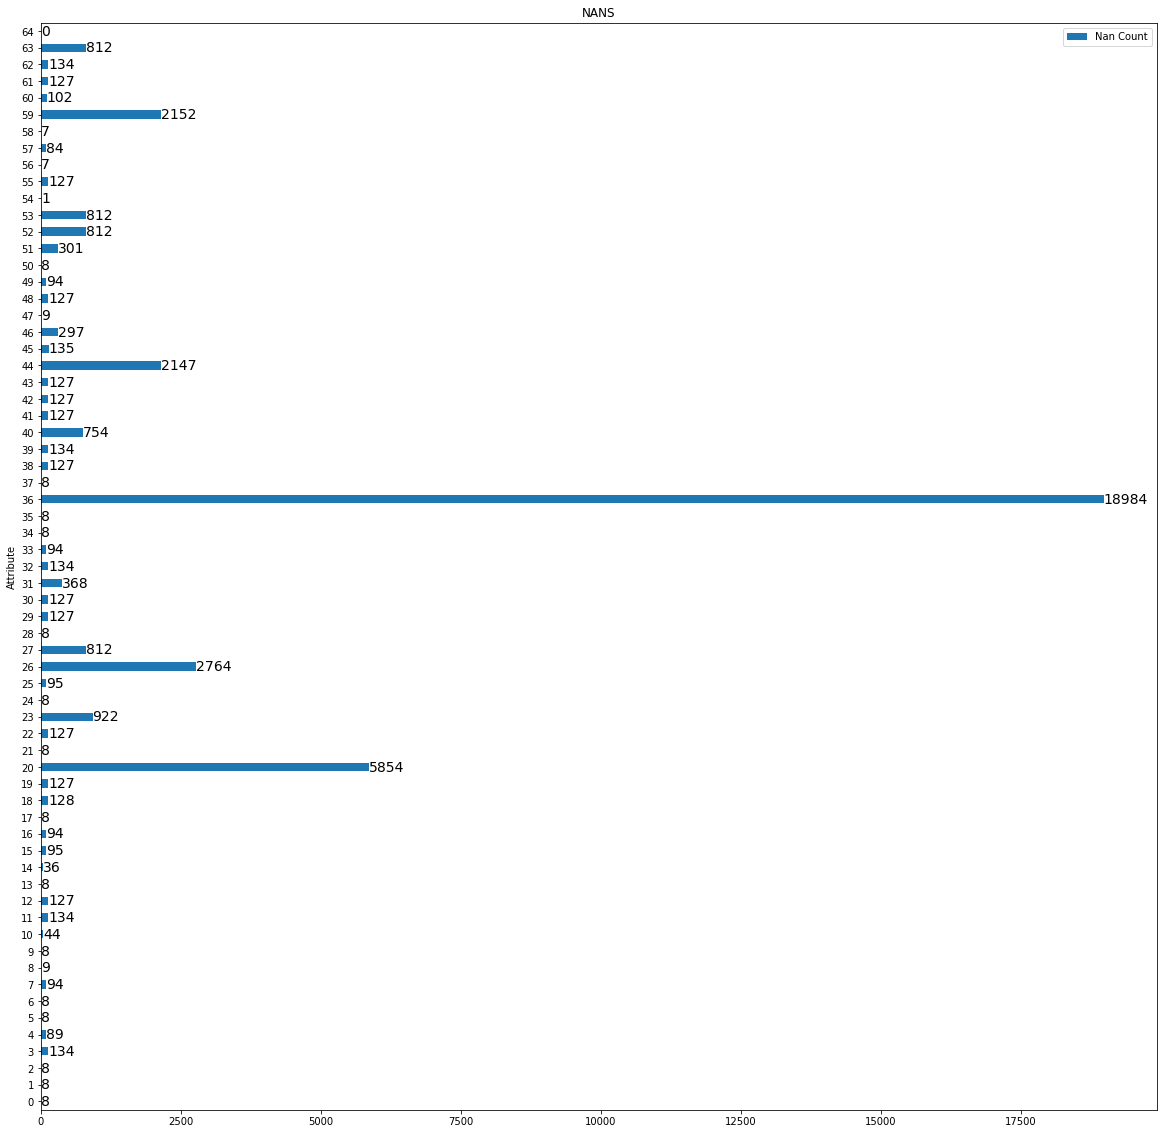

In [ ]:
# Checking out missing values - note no missing values came from target
nan_columns = []
nan_values = []

for column in data.columns:
    nan_columns.append(column)
    nan_values.append(data[column].isnull().sum())
    
nan_dict = {'Attributes': nan_columns, "Nan Count": nan_values}
nan_df = pd.DataFrame(nan_dict)

# This part requires updated MPL to 3.4.2 and PD 1.2.4
ax = nan_df.plot(kind='barh', stacked=True, figsize=(20, 20), rot=0, xlabel='Attribute', ylabel='Count', title = 'NANS')
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize = 14)

Fill all Missing data with interpolated values wrt column

In [ ]:
# Filled all missing values with the mean of the column - easy to change from middle argument
data = data.where(pd.notna(data), data.interpolate(), axis="columns")

In [ ]:
# Now Missing
missing = data.isnull().any(axis=1).sum()
len_before = data.shape[0]
print(f"Total records missing data: {missing}\n"
      f"Total percent of incomplete records: {missing/len_before*100:.2f}%"
     )

Total records missing data: 0
Total percent of incomplete records: 0.00%


<a name="Duplicates"></a>
#### Duplicates

In [ ]:
dups = data.loc[:, data.columns != 'encounter_id'].duplicated().sum()

f"{dups/len(data)*100:1.2f}% of all records are considered duplicates"

'0.53% of all records are considered duplicates'

<a name="CorrelationIssues"></a>
### Correlation Issues

Wall time: 1 s


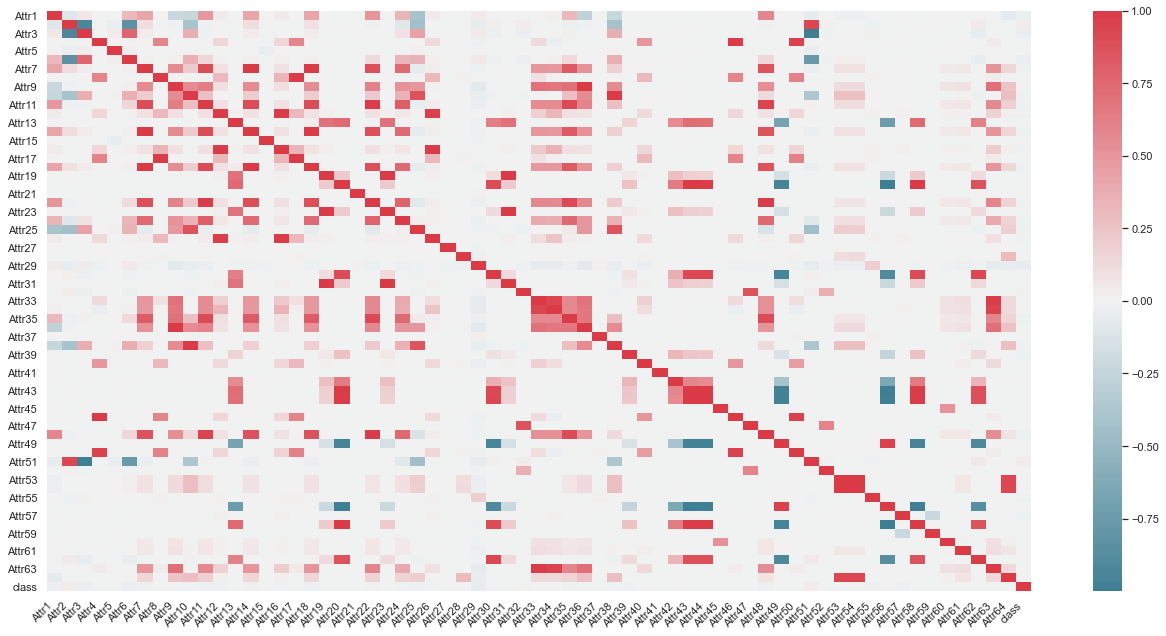

In [ ]:
%%time
#Correlation check all correlations
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(data.corr(), cmap=cmap, annot=False)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

In [ ]:
sort_corr = pd.DataFrame(abs(data.corr().unstack().sort_values().drop_duplicates()))
sort_corr.rename(columns={0:'Top Abs Corr'}, inplace=True)
sort_corr.head(15)
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

Top Abs Corr
Attr20 Attr56      0.999880
Attr3  Attr51      0.998219
Attr56 Attr58      0.998218
Attr43 Attr56      0.992552
Attr44 Attr56      0.986657
       Attr49      0.975099
Attr43 Attr49      0.973587
Attr20 Attr49      0.959395
Attr49 Attr58      0.956980
       Attr30      0.948070
Attr2  Attr3       0.926983
Attr62 Attr49      0.908063
Attr30 Attr56      0.903158
Attr62 Attr56      0.864130
Attr6  Attr2       0.842916

<a name="ModelingPreparations"></a>
# Model Preparations

#### Common Model Hyperparameters

In [ ]:
# Setting some future Hyperparameters
rs = 42
split_size  = 0.33
nj = -1

#### Setting Target (class) and data (everything else)

In [ ]:
# Splitting into data and target and sanity checks
target = data['class']
data = data.drop('class', axis =1)
data.shape, target.shape

((43405, 64), (43405,))

#### Scale and Train/Test Split

In [ ]:
# Create test/train splits - they are stratified

X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= split_size, random_state = rs, stratify=y)

# Scale Data
SS = StandardScaler()
SS.fit(X_train)
X_train = SS.transform(X_train)
X_test = SS.transform(X_test)


# Sanity
X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(X_train), type(X_test)

((29081, 64), (14324, 64), (29081,), (14324,), numpy.ndarray, numpy.ndarray)

<a name="ModelingBuilding"></a>
# Model Building

#### Feature Selection Using Random Forest

In [ ]:
# Find Best Features using RF (save results for later output)
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=rs, n_jobs=nj))
sel.fit(X_train, y_train)

selected_feat = data.columns[(sel.get_support())]
print(f'Number of Selected Features: {len(selected_feat)}')


# Transform Training and test Data - note test data transformed using train fit
X_train_best = sel.transform(X_train)
X_test_best = sel.transform(X_test)
X_train_best.shape, X_test_best.shape

Number of Selected Features: 21


((29081, 21), (14324, 21))

# Model Tuning & XGBoost

## GridSearch CV and Model Setting

#### CV Object

In [ ]:
# classification task - note since we are using gridsearchCV the models are being 5x CV while being searched
cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# <a name="GridSearch"></a>
#### GridSearch and CV


In [ ]:
# HP and CV for Normal Data Set
time.time()
start_time = time.time()

clf_decision = DecisionTreeClassifier(criterion='gini', class_weight='balanced', random_state=rs)

# setting the parameters
grid = {}
grid['max_depth'] = [10, 20, 30]
grid['splitter'] = ['best', 'random']
grid['ccp_alpha'] = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]


# define search
search_recall = GridSearchCV(clf_decision, grid, scoring='accuracy', cv=cv_clf, n_jobs=nj, verbose=3, error_score='raise')

# perform the search
results_recall_dc = search_recall.fit(X_train_best, y_train)


# summarize
print('Mean accuracy: %.3f' % results_recall_dc.best_score_)
print(f'Best estimator: {results_recall_dc.best_estimator_}\n')

clf_Decision_Tree_n = results_recall_dc.best_estimator_

#=========================================================================================================================

clf_decision = RandomForestClassifier(criterion = 'entropy', class_weight='balanced', random_state=rs,
                                      n_estimators=50, n_jobs=nj)
 
# setting the parameters
grid = {}
grid['min_samples_split'] = [1, 4, 8]
grid['max_depth'] = [10, 20, 30]
grid['ccp_alpha'] = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]

# define search
search_recall = GridSearchCV(clf_decision, grid, scoring='accuracy', cv=cv_clf, n_jobs=nj, verbose=1)

# perform the search
results_recall_dc = search_recall.fit(X_train_best, y_train)


# summarize
print('Mean accuracy: %.3f' % results_recall_dc.best_score_)
print(f'Best estimator: {results_recall_dc.best_estimator_}\n')

clf_RFC_n = results_recall_dc.best_estimator_
#===================================================================================================================

clf_decision = ExtraTreesClassifier(criterion = 'entropy', class_weight='balanced', random_state=rs,
                                    n_estimators=50, n_jobs=nj)

# setting the parameters
grid = {}
grid['n_estimators'] = [10, 50, 100]
grid['min_samples_split'] = [1, 4, 8]
grid['max_depth'] = [10, 20, 30]
grid['ccp_alpha'] = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]


# define search
search_recall = GridSearchCV(clf_decision, grid, scoring='accuracy', cv=cv_clf, n_jobs=nj, verbose=1)

# perform the search
results_recall_dc = search_recall.fit(X_train_best, y_train)


# summarize
print('Mean accuracy: %.3f' % results_recall_dc.best_score_)
print(f'Best estimator: {results_recall_dc.best_estimator_}\n')

clf_ETC_n = results_recall_dc.best_estimator_
#=============================================================================
print(f'Time to run {round(time.time() - start_time,4)} Seconds')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   11.5s finished


Mean accuracy: 0.927
Best estimator: DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced', max_depth=30,
                       random_state=42)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.3min finished


Mean accuracy: 0.963
Best estimator: RandomForestClassifier(ccp_alpha=0.0005, class_weight='balanced',
                       criterion='entropy', max_depth=20, min_samples_split=4,
                       n_estimators=50, n_jobs=-1, random_state=42)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.4min finished


Mean accuracy: 0.862
Best estimator: ExtraTreesClassifier(ccp_alpha=0.0001, class_weight='balanced',
                     criterion='entropy', max_depth=30, min_samples_split=4,
                     n_estimators=50, n_jobs=-1, random_state=42)

Time to run 236.5891 Seconds


#### XGB Classifier Tuning and CV

In [ ]:
#XGBOOST classifier, hyperparameter tuning - this one split out due to comp time
time.time()
start_time = time.time()

clf_decision = XGBClassifier(objective='binary:logistic', random_state=rs, use_label_encoder=False)

# setting the parameters
grid = {}
grid['min_child_weight'] = [1,5,10]
grid['max_depth'] = [10, 20, 30]
grid['subsample'] = [0.75, 0.5]
grid['reg_lambda'] = [0, 0.25, 0.5]
grid['reg_alpha'] = [0, 0.25, 0.5]

# define search
search_recall = GridSearchCV(clf_decision, grid, scoring='accuracy', cv=cv_clf, n_jobs=nj, verbose=3)

# perform the search
results_recall_dc = search_recall.fit(X_train_best, y_train)


# summarize
print('Mean accuracy: %.3f' % results_recall_dc.best_score_)
print('Config accuracy: %s' % results_recall_dc.best_params_)

print(f'Best estimator: {results_recall_dc.best_estimator_}\n')

clf_xgb = results_recall_dc.best_estimator_

print(f'Time to run {round(time.time() - start_time,4)} Seconds')

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 26.8min finished


[15:29:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean accuracy: 0.971
Config accuracy: {'max_depth': 10, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.75}
Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=0.75,
              tree_method=

#### Voting Classifier

In [ ]:
%%time
# How Did it do? - weights determined in raw file

estimators = [('DT', clf_Decision_Tree_n), ('RFC', clf_RFC_n), ('ETC', clf_ETC_n), ('XGB', clf_xgb)]
ensemble_norm = VotingClassifier(estimators, voting='soft', weights=[1,1,1,3])
ensemble_norm.fit(X_train, y_train)

[15:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 13.3 s


VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0001,
                                                     class_weight='balanced',
                                                     max_depth=30,
                                                     random_state=42)),
                             ('RFC',
                              RandomForestClassifier(ccp_alpha=0.0005,
                                                     class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=20,
                                                     min_samples_split=4,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42)),
                             ('ETC',
                              ExtraTreesClassifier(ccp_alpha=0.0001,
                

<a name="ModelingEvaluation"></a>
# Model Evaluation

#### Overall Model Comparisons

In [ ]:
# Comparing the best models

ypred = clf_Decision_Tree_n.predict(X_test_best)
print('='*80)
print(confusion_matrix(y_test, ypred))
print(f''' Decision Tree ACC: {round(accuracy_score(y_test, ypred), 5)},
      Decision Tree f1: {round(f1_score(y_test, ypred), 5)},
      Decision Tree Precision: {round(precision_score(y_test, ypred), 5)},
      Decision Tree Recall: {round(recall_score(y_test, ypred), 5)}''')
print('='*80)
# ========================================================================================

ypred = clf_RFC_n.predict(X_test_best)

print(confusion_matrix(y_test, ypred))
print(f''' RFC ACC: {round(accuracy_score(y_test, ypred), 5)},
      RFC f1: {round(f1_score(y_test, ypred), 5)},
      RFC Precision: {round(precision_score(y_test, ypred), 5)},
      RFC Recall: {round(recall_score(y_test, ypred), 5)}''')
print('='*80)
# ========================================================================================

ypred = clf_ETC_n.predict(X_test_best)

print(confusion_matrix(y_test, ypred))
print(f''' ETC ACC: {round(accuracy_score(y_test, ypred), 5)},
      ETC f1: {round(f1_score(y_test, ypred), 5)},
      ETC Precision: {round(precision_score(y_test, ypred), 5)},
      ETC Recall: {round(recall_score(y_test, ypred), 5)}''')
print('='*80)
# ========================================================================================

ypred = clf_xgb.predict(X_test_best)

print(confusion_matrix(y_test, ypred))
print(f''' XGB ACC: {round(accuracy_score(y_test, ypred), 5)},
      XGB f1: {round(f1_score(y_test, ypred), 5)},
      XGB Precision: {round(precision_score(y_test, ypred), 5)},
      XGB Recall: {round(recall_score(y_test, ypred), 5)}''')
print('='*80)
# ========================================================================================
Y_pred = ensemble_norm.predict(X_test)
print(confusion_matrix(y_test, Y_pred))
print(f''' Voting Acc: {round(accuracy_score(y_test, Y_pred), 5)},
      Voting f1: {round(f1_score(y_test, Y_pred), 5)},
      Voting Precision: {round(precision_score(y_test, Y_pred), 5)},
      Voting Recall: {round(recall_score(y_test, Y_pred), 5)}''')
print('='*80)

[[12941   693]
 [  376   314]]
 Decision Tree ACC: 0.92537,
      Decision Tree f1: 0.37006,
      Decision Tree Precision: 0.31182,
      Decision Tree Recall: 0.45507
[[13555    79]
 [  455   235]]
 RFC ACC: 0.96272,
      RFC f1: 0.46813,
      RFC Precision: 0.74841,
      RFC Recall: 0.34058
[[11704  1930]
 [  331   359]]
 ETC ACC: 0.84215,
      ETC f1: 0.24102,
      ETC Precision: 0.15684,
      ETC Recall: 0.52029
[[13588    46]
 [  380   310]]
 XGB ACC: 0.97026,
      XGB f1: 0.59273,
      XGB Precision: 0.87079,
      XGB Recall: 0.44928
[[13602    32]
 [  408   282]]
 Voting Acc: 0.96928,
      Voting f1: 0.56175,
      Voting Precision: 0.89809,
      Voting Recall: 0.4087


C:\Users\Adam\.conda\envs\ML7331\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Adam\.conda\envs\ML7331\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<a name="ModelInterpretability"></a>
# Model Interpretability & Explainability

In [ ]:
# We can see selected features from Random Forest model above
selected_feat

Index(['Attr5', 'Attr6', 'Attr9', 'Attr13', 'Attr21', 'Attr22', 'Attr24',
       'Attr27', 'Attr29', 'Attr34', 'Attr35', 'Attr39', 'Attr40', 'Attr41',
       'Attr42', 'Attr44', 'Attr46', 'Attr55', 'Attr56', 'Attr58', 'Attr61'],
      dtype='object')

##### Selected Features:
    - X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
    - X6 retained earnings / total assets
    - X9 sales / total assets
    - X13 (gross profit + depreciation) / sales
    - X21 sales (n) / sales (n-1)
    - X22 profit on operating activities / total assets
    - X24 gross profit (in 3 years) / total assets
    - X27 profit on operating activities / financial expenses
    - X29 logarithm of total assets
    - X34 operating expenses / total liabilities
    - X35 profit on sales / total assets
    - X39 profit on sales / sales
    - X40 (current assets - inventory - receivables) / short-term liabilities
    - X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
    - X42 profit on operating activities / sales
    - X44 (receivables * 365) / sales
    - X46 (current assets - inventory) / short-term liabilities
    - X55 working capital
    - X56 (sales - cost of products sold) / sales
    - X58 total costs /total sales
    - X61 sales / receivables